In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
tokenizer = AutoTokenizer.from_pretrained('gpt2')
model = AutoModelForCausalLM.from_pretrained('gpt2')

/Users/oskarjor/miniconda3/envs/start-code/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [33]:
text = "Once upon a"
encoded_input = tokenizer(text, return_tensors='pt')
input_ids = encoded_input['input_ids']
attn_mask = encoded_input['attention_mask']
gen_tokens = model.generate(
    input_ids, 
    attention_mask=attn_mask,
    pad_token_id=tokenizer.eos_token_id,
    do_sample=True,
    temperature=1.0,
    max_length=100
)
gen_text = tokenizer.batch_decode(gen_tokens)[0]
print(gen_text)

Once upon a certain horizon, a lot of things are going to fall into place that are going to be hard to figure out. That's what makes the book so difficult."

And, he adds, it must remain that way.

"And I can't say, as a writer, that we'll never get to the stage where there's a new chapter of story unfolding," she explains. "In fact, I would argue that most of the book, given the weight and resources


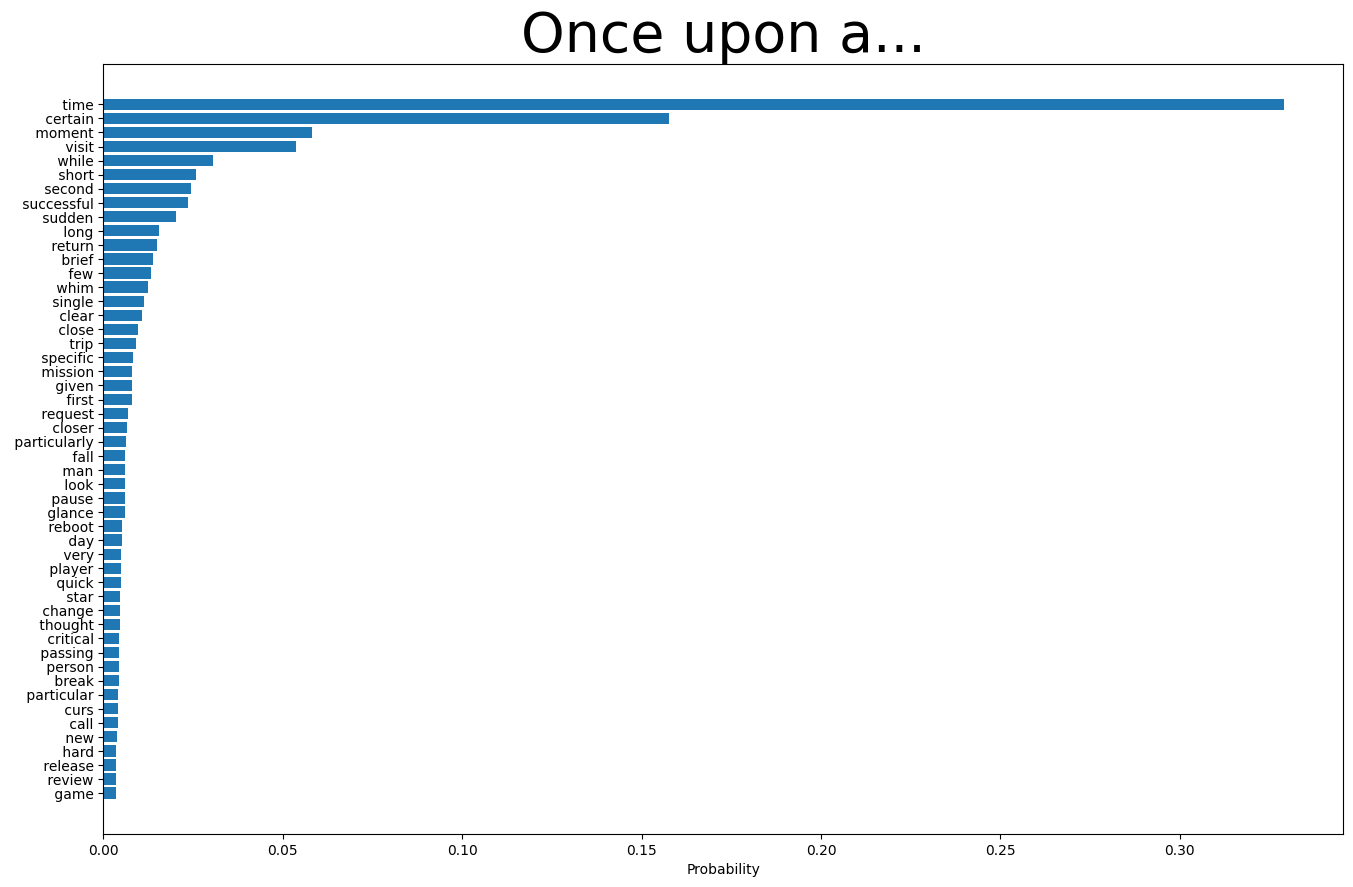

In [50]:
import matplotlib.pyplot as plt

# we will only look at the next token
k = 50
next_token = model(**encoded_input).logits[0, -1, :].detach()
top_k = next_token.topk(k).indices
top_k_tokens = tokenizer.batch_decode(top_k)

fig, ax = plt.subplots(figsize=(16, 10))
ax.barh(top_k_tokens, next_token[top_k].softmax(dim=0))
ax.invert_yaxis()
ax.set_xlabel('Probability')
ax.set_title(text + "...")
ax.title.set_fontsize(40)
plt.show()
